# Project Title: Laptop Price Prediction for SmartTech Co.

##  Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
laptop_data = pd.read_csv('C:/Users/pkv26/OneDrive/Desktop/capstone project things/laptop.csv')
laptop_data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
laptop_copy = laptop_data.copy()

In [4]:
laptop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Remove unwanted columns
laptop_copy = laptop_copy.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
laptop_copy.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
# check for null values
laptop_copy.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
null_data = laptop_copy[laptop_copy.isnull().any(axis=1)]
null_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
laptop_copy = laptop_copy.dropna(how='all').reset_index(drop=True)

In [9]:
print(laptop_copy.shape)

(1273, 11)


In [10]:
laptop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 109.5+ KB


C:\Users\pkv26\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

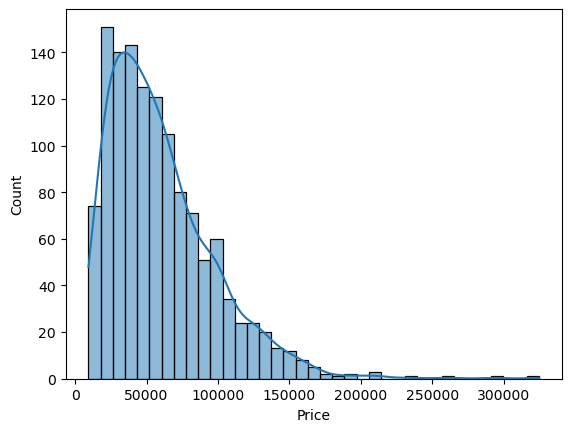

In [11]:
sns.histplot(laptop_copy['Price'], kde=True)

# Data Preprocessing

In [12]:
laptop_copy.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
print("Unique Inches")
print(laptop_copy['Inches'].unique())
print("Unique Ram")
print(laptop_copy['Ram'].unique())
print("Unique Weight")
print(laptop_copy['Weight'].unique())

Unique Inches
['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']
Unique Ram
['8GB' '16GB' '4GB' '2GB' '12GB' '64GB' '6GB' '32GB' '24GB' '1GB']
Unique Weight
['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg' '1.35kg'
 '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg' '2kg'
 '2.65kg' '2.77kg' '3.2kg' '1.49kg' '2.4kg' '2.13kg' '2.43kg' '1.7kg'
 '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg' '1.63kg'
 '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg' '1.58kg'
 '1.85kg' '1.23kg' '2.16kg' '2.36kg' '7.2kg' '2.05kg' '1.32kg' '1.75kg'
 '0.97kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg' '2.03kg' '1.05kg'
 '5.4kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg' '1.12kg'
 '3.49kg' '3.35kg' '2.23kg' '?' '2.9kg' '4.42kg' '2.69kg' '2.37kg' '4.7kg'
 '3.6kg' '2.08kg' '4.3kg

In [14]:
print(laptop_copy[laptop_copy['Inches'] == '?'])
print(laptop_copy[laptop_copy['Weight'] == '?'])

    Company     TypeName Inches   ScreenResolution  \
465    Dell  Workstation      ?  Full HD 1920x1080   

                             Cpu  Ram     Memory                  Gpu  \
465  Intel Core i7 7700HQ 2.8GHz  8GB  256GB SSD  Nvidia Quadro M1200   

          OpSys  Weight      Price  
465  Windows 10  1.78kg  128298.24  
    Company   TypeName Inches   ScreenResolution                         Cpu  \
201    Dell  Ultrabook   13.3  Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   

     Ram     Memory                     Gpu       OpSys Weight     Price  
201  8GB  256GB SSD  Intel UHD Graphics 620  Windows 10      ?  77202.72  


In [15]:
#Replace ? with NAN first
laptop_copy['Inches'] = laptop_copy['Inches'].replace('?', None)
laptop_copy['Weight'] = laptop_copy['Weight'].replace('?', None)
laptop_copy['Ram'] = laptop_copy['Ram'].str.replace('GB', '')
laptop_copy['Weight'] = laptop_copy['Weight'].str.replace('kg', '').str.strip()

#Convert to numeric (Handaling missing values as NAN)
laptop_copy['Inches'] = pd.to_numeric(laptop_copy['Inches'], errors='coerce')
laptop_copy['Weight'] = pd.to_numeric(laptop_copy['Weight'], errors='coerce')
laptop_copy['Ram'] = pd.to_numeric(laptop_copy['Ram'], errors='coerce')

#Replace NaN with mean or median
laptop_copy['Inches'].fillna(laptop_copy['Inches'].mean())
laptop_copy['Weight'].fillna(laptop_copy['Weight'].mean())


0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1268    1.80
1269    1.30
1270    1.50
1271    2.19
1272    2.20
Name: Weight, Length: 1273, dtype: float64

In [16]:
laptop_copy.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [17]:
laptop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 109.5+ KB


**Outlier detection**

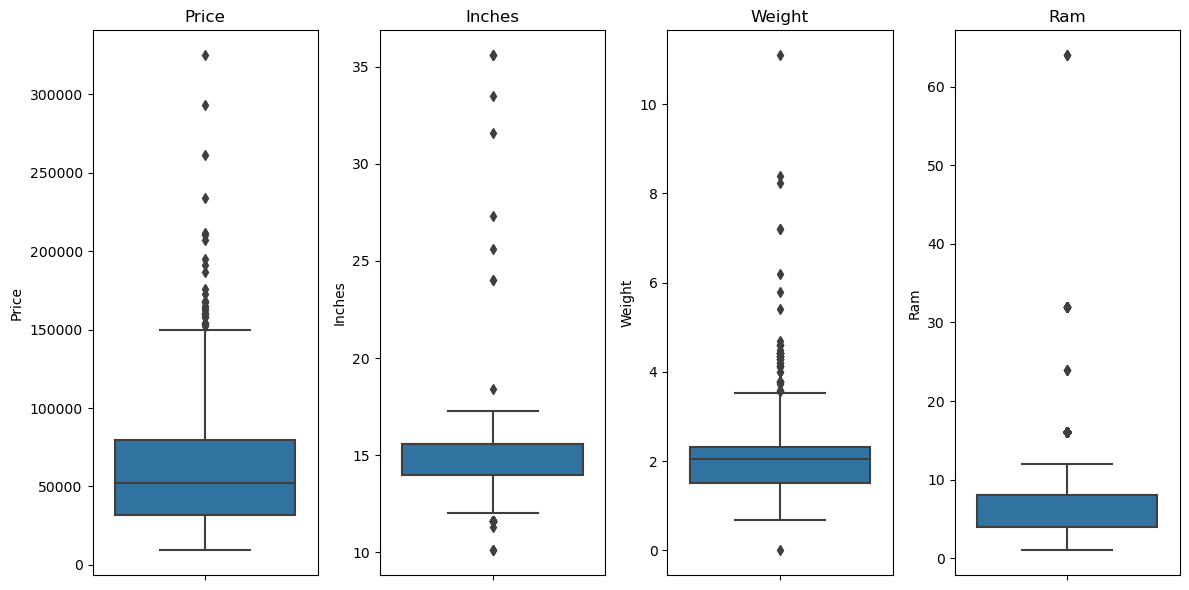

In [18]:
features = ['Price', 'Inches', 'Weight', 'Ram']
plt.figure(figsize=(12,6))
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(y=laptop_copy[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [19]:
#Removing Outliers
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df
for feature in ['Price', 'Inches', 'Weight', 'Ram']:
    laptop_copy = remove_outlier(laptop_copy, feature)

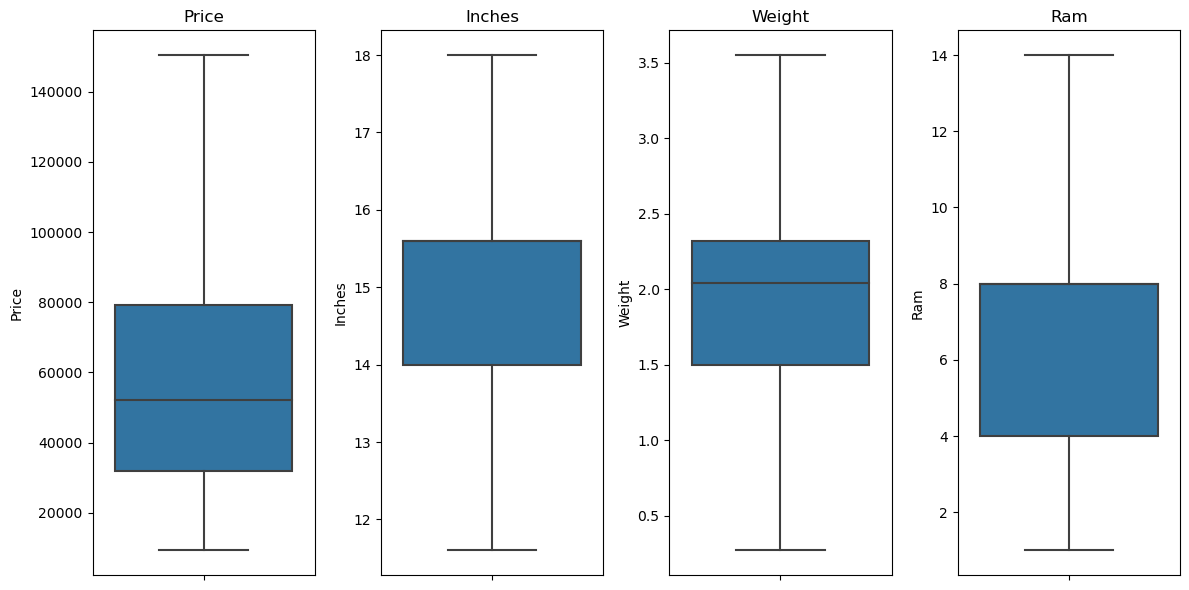

In [20]:
# After removing outliers
Features = ['Price', 'Inches', 'Weight', 'Ram']
plt.figure(figsize=(12,6))
for i, Feature in enumerate(Features, 1):
    plt.subplot(1, len(Features), i)
    sns.boxplot(y=laptop_copy[Feature])
    plt.title(Feature)
plt.tight_layout()
plt.show()

**Extracting Touchscreen and Screenresolution Info**

In [21]:
#Extracting Touchscreen from Screenresolution column.
laptop_copy['Touchscreen'] = laptop_copy['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [22]:
# Extracting Panel type from Screenresolution column
laptop_copy['IPS'] = laptop_copy['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [23]:
laptop_copy.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


# **Univariate Analysis**

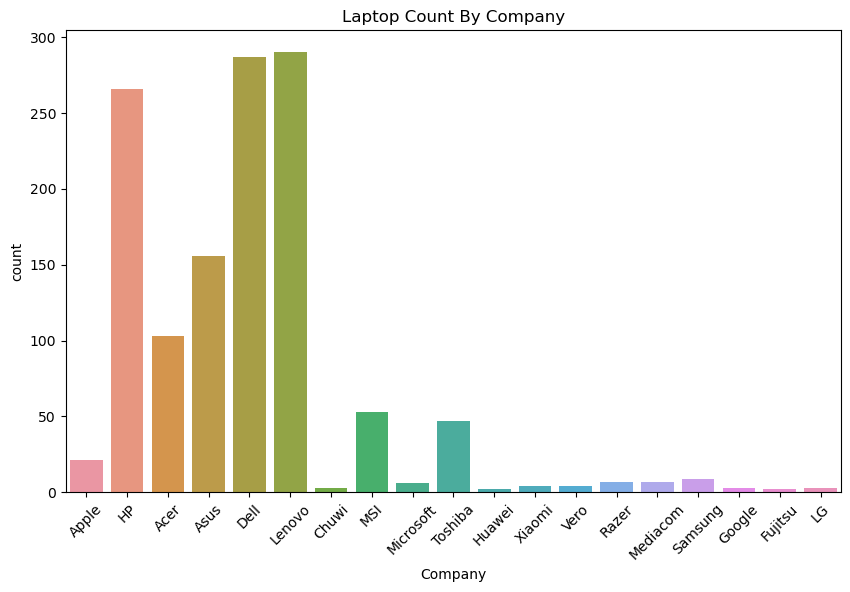

In [24]:
# Company 
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_copy, x="Company")
plt.xticks(rotation=45)
plt.title("Laptop Count By Company")
plt.show()

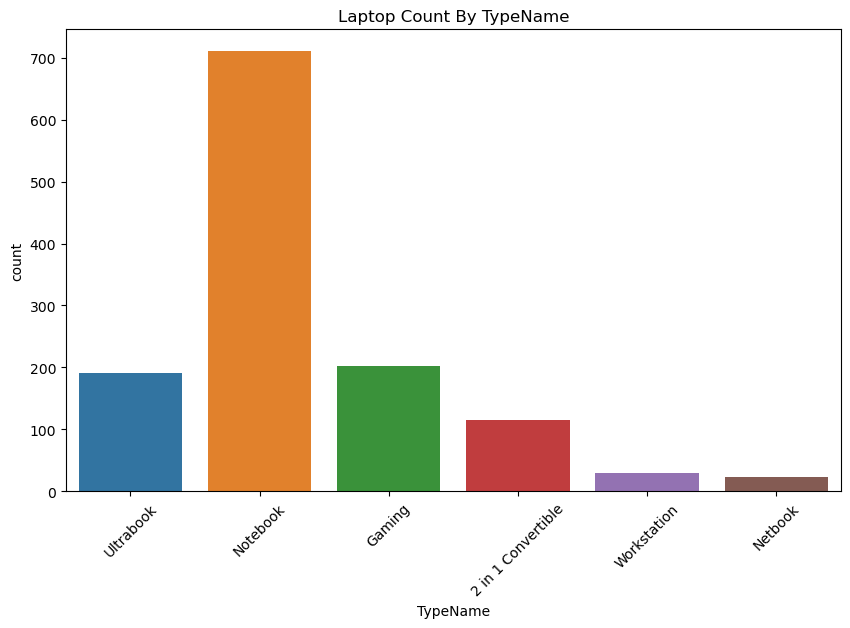

In [25]:
# TypeName
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_copy, x="TypeName")
plt.xticks(rotation=45)
plt.title("Laptop Count By TypeName")
plt.show()

C:\Users\pkv26\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


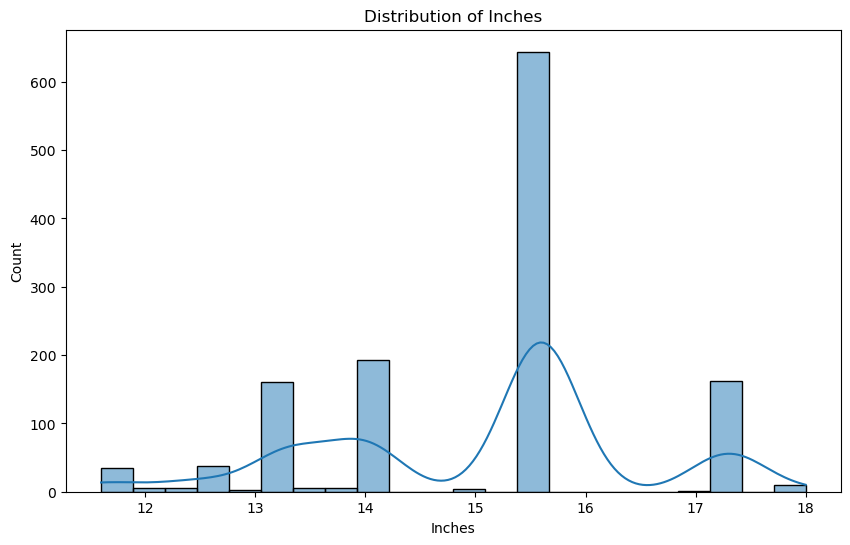

In [26]:
# Inches
plt.figure(figsize=(10, 6))
sns.histplot(laptop_copy['Inches'], kde=True)
plt.title("Distribution of Inches")
plt.show()

In [27]:
laptop_copy.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS'],
      dtype='object')

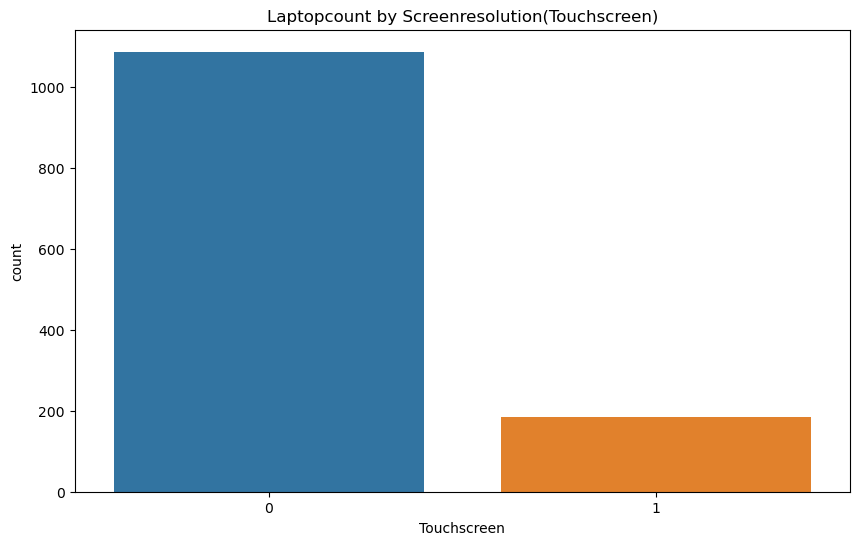

In [28]:
# Touchscreen and IPS
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_copy, x='Touchscreen')
plt.title("Laptopcount by Screenresolution(Touchscreen)")
plt.show()

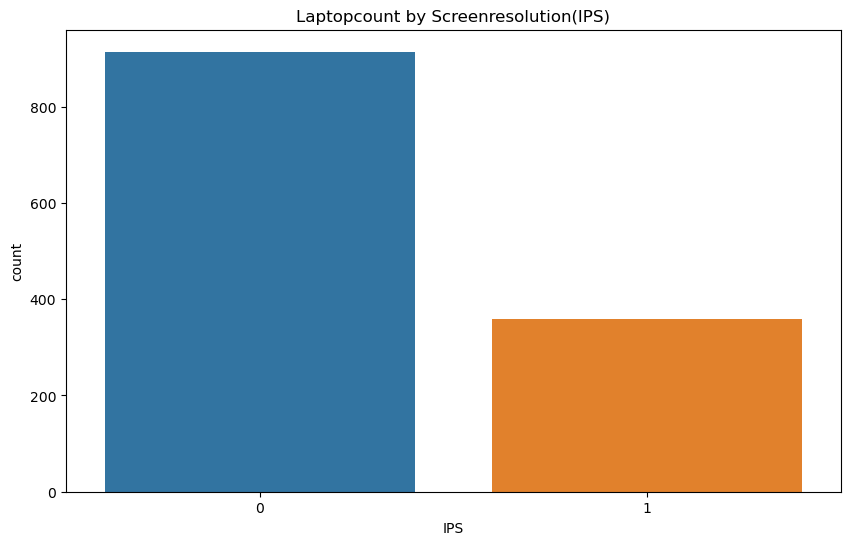

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_copy, x='IPS')
plt.title("Laptopcount by Screenresolution(IPS)")
plt.show()

In [30]:
print(laptop_copy['Cpu'].unique())

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series E2-6110 1.5GHz'
 'AMD A6-Series 9220 2.5GHz' 'Intel Celeron Dual Core N3350 1.1GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 2.0GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Celeron Dual Core N3060 1.6GHz' 'Intel Core i5 1.3GHz'
 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 6200U 2.3GHz'
 'Intel Core M 6Y75 1.2GHz' 'Intel Core i5 7500U 

In [31]:
#Fetch different brands
def fetch_cpu_brand(text):
    words = text.split()[:3]
    cpu_name = " ".join(words)
    if cpu_name in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return cpu_name
    elif 'Intel' in cpu_name:
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
# Apply the function
laptop_copy["CPU_Brand"] = laptop_copy["Cpu"].apply(fetch_cpu_brand)

laptop_copy.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,CPU_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


In [32]:
print(laptop_copy['CPU_Brand'].unique())

['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']


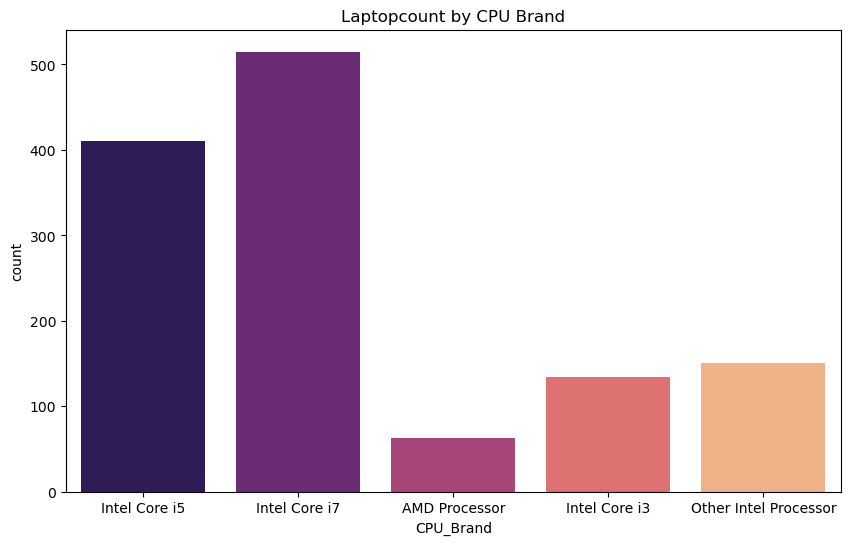

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_copy, x='CPU_Brand', palette="magma")
plt.title("Laptopcount by CPU Brand")
plt.show()

In [34]:
laptop_copy.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'CPU_Brand'],
      dtype='object')

In [35]:
laptop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  CPU_Brand         1273 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 139.4+ KB


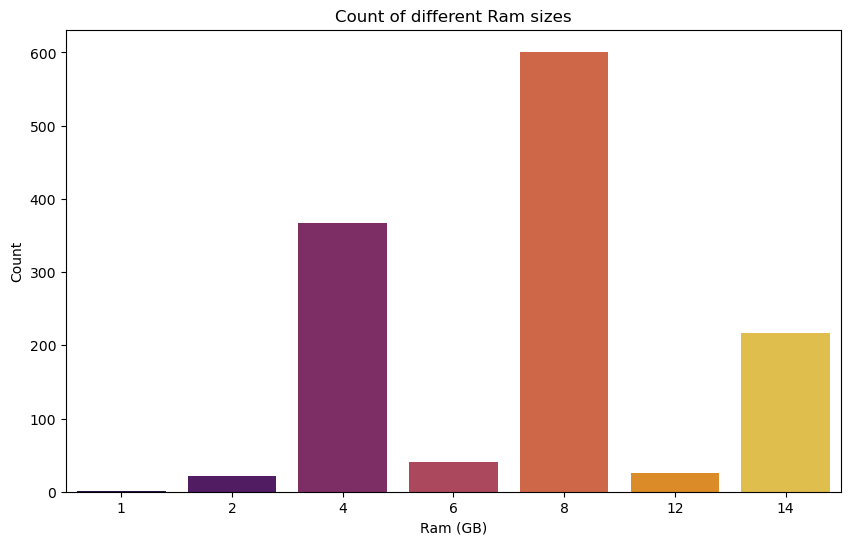

In [36]:
#Ram
plt.figure(figsize=(10, 6))
sns.barplot(x=laptop_copy["Ram"].value_counts().index, y=laptop_copy["Ram"].value_counts().values, palette="inferno")
plt.title("Count of different Ram sizes")
plt.xlabel("Ram (GB)")
plt.ylabel("Count")
plt.show()

Memory

In [37]:
laptop_copy["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [38]:
# Replace "?" with NaN
laptop_copy["Memory"] = laptop_copy["Memory"].replace("?", np.nan)

In [39]:
laptop_copy["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', nan, '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [40]:
# Function to extract memory details:

def process_memory(memory):
    if pd.isna(memory):   # Handels NaN values
        return pd.Series([np.nan, np.nan, np.nan, np.nan])
    
    memory = memory.replace('1.0TB', '1000GB') # Convert 1.0TB to 1000GB
    
    ssd = hdd = flash = hybrid = 0
    
    for part in memory.split('+'):
        part = part.replace('TB', '000GB')
        
        size = int(''.join(filter(str.isdigit, part)))
        
        if 'SSD' in part:
            ssd += size
        elif 'HDD' in part:
            hdd += size
        elif 'Flash Storage' in part:
            flash += size
        elif 'Hybrid' in part:
            hybrid += size
    return pd.Series([ssd, hdd, flash, hybrid])       

In [41]:
# Apply function:
laptop_copy[['SSD', 'HDD', 'Flash_Storage', 'Hybrid']] = laptop_copy['Memory'].apply(process_memory)

laptop_copy.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,256.0,0.0,0.0,0.0


GPU Brand

In [42]:
laptop_copy["GPU_Brand"] = laptop_copy["Gpu"].apply(lambda x: x.split()[0])
laptop_copy["GPU_Brand"].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

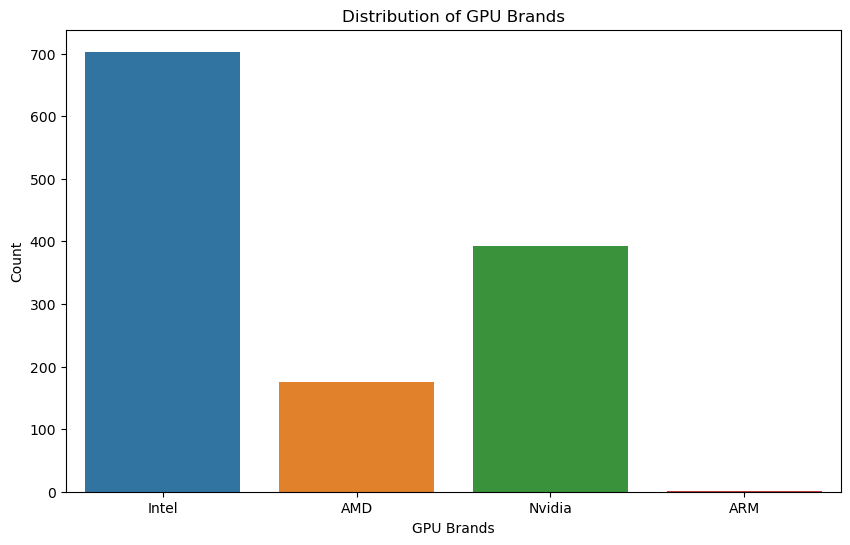

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_copy, x="GPU_Brand")
plt.title("Distribution of GPU Brands")
plt.xlabel("GPU Brands")
plt.ylabel("Count")
plt.show()

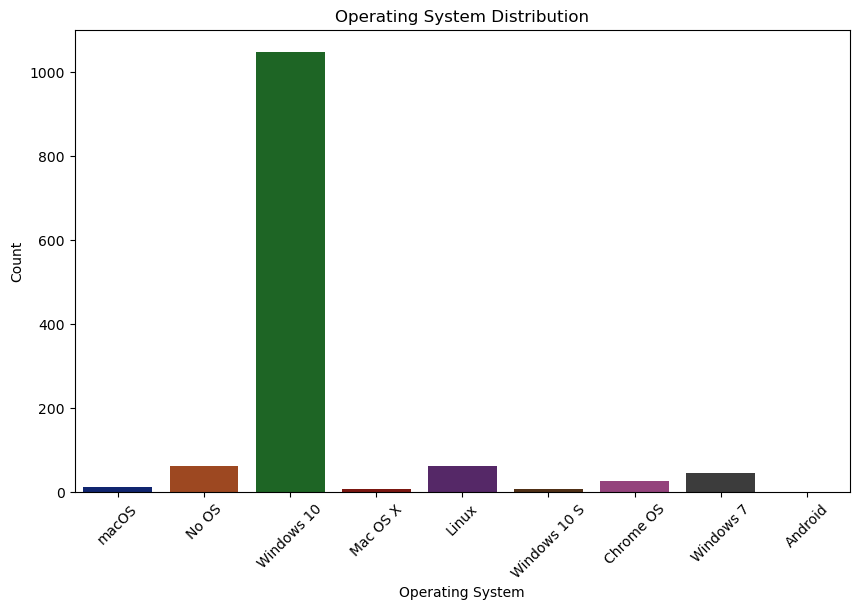

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_copy, x="OpSys", palette="dark")
plt.xticks(rotation=45)
plt.title("Operating System Distribution")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.show()

C:\Users\pkv26\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


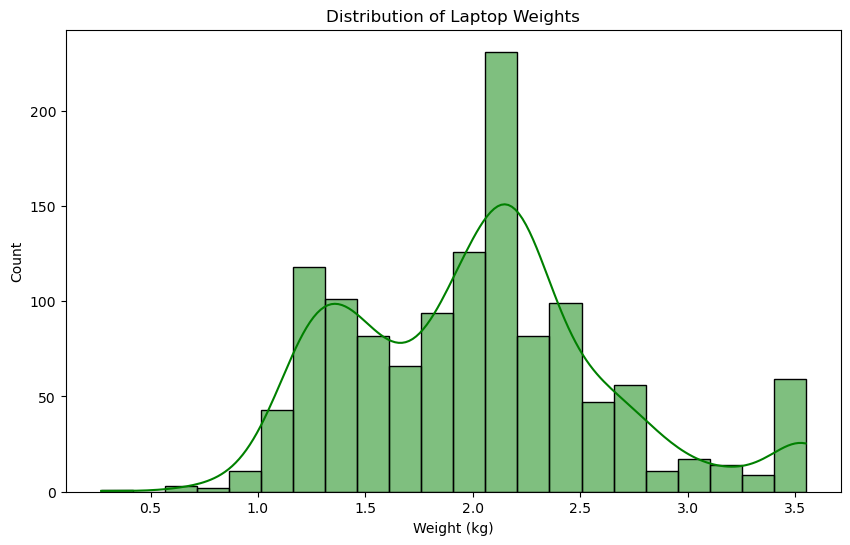

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(laptop_copy['Weight'], kde=True, color="green")
plt.title("Distribution of Laptop Weights")
plt.xlabel("Weight (kg)")
plt.show()

# Bivariate Analysis

Numerical Columns vs Price

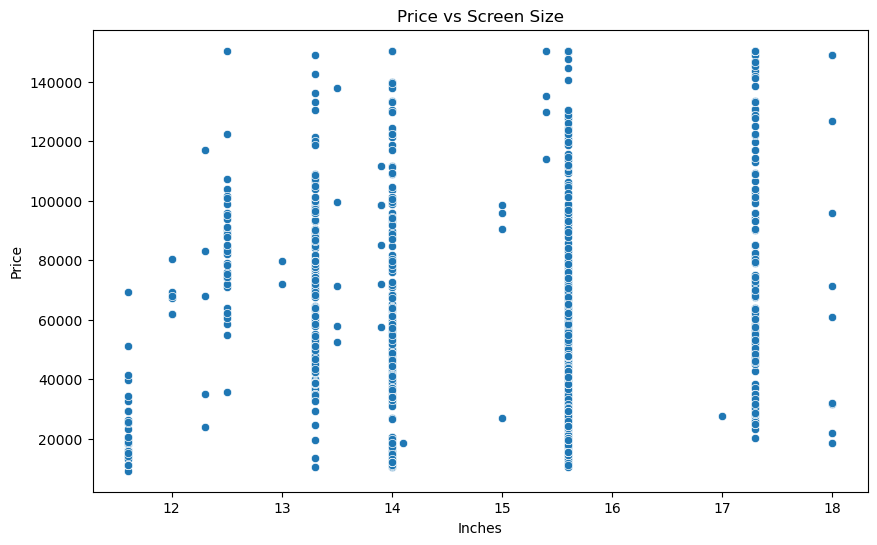

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=laptop_copy, x="Inches", y="Price")
plt.title("Price vs Screen Size")
plt.show()

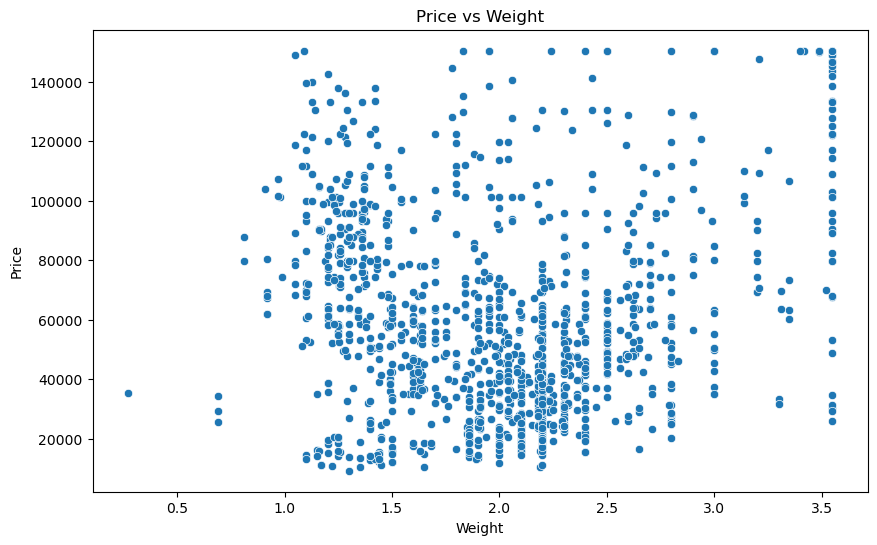

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=laptop_copy, x="Weight", y="Price")
plt.title("Price vs Weight")
plt.show()

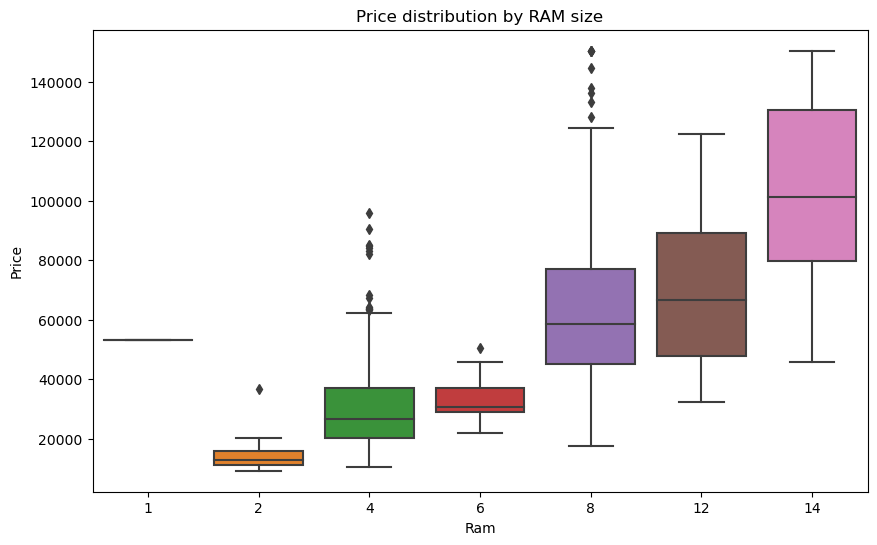

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_copy, x="Ram", y="Price")
plt.title("Price distribution by RAM size")
plt.show()

Categorical Columns vs Price

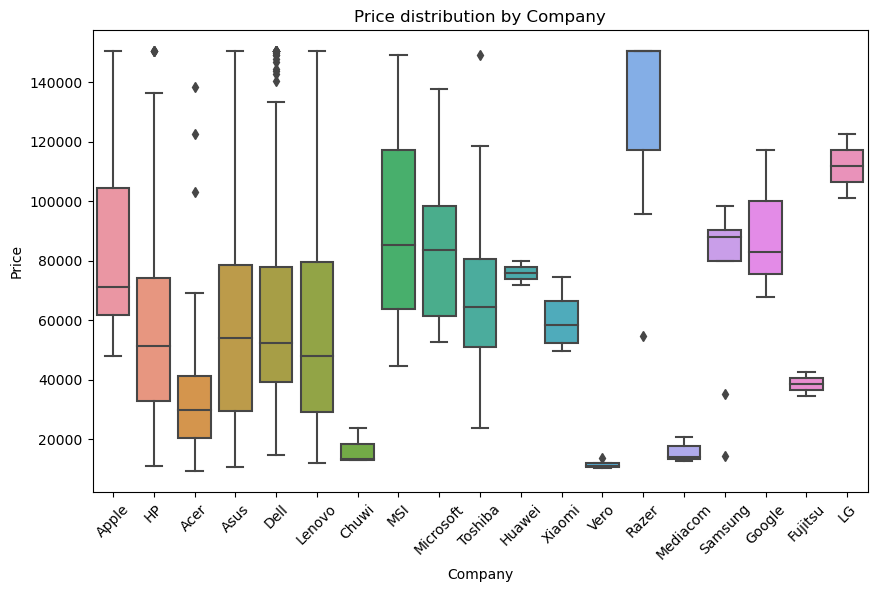

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_copy, x="Company", y="Price")
plt.xticks(rotation=45)
plt.title("Price distribution by Company")
plt.show()

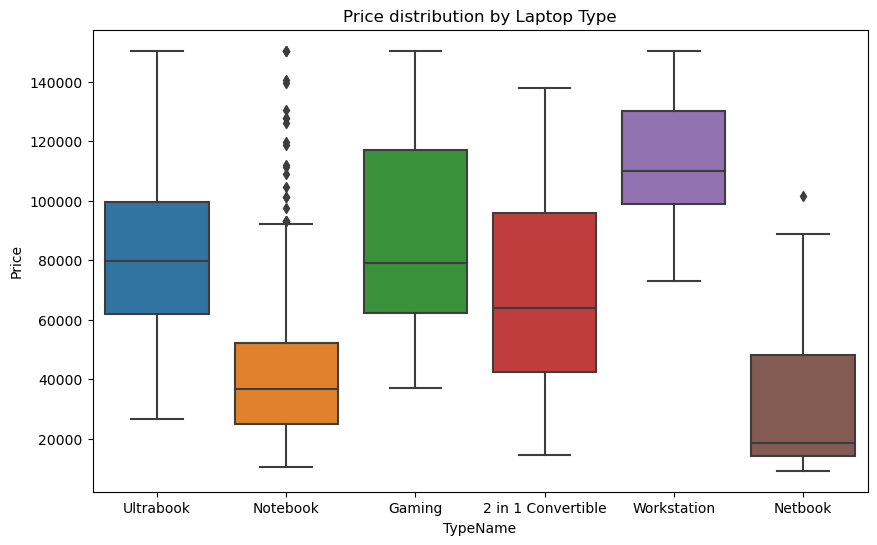

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_copy, x="TypeName", y="Price")
plt.title("Price distribution by Laptop Type")
plt.show()

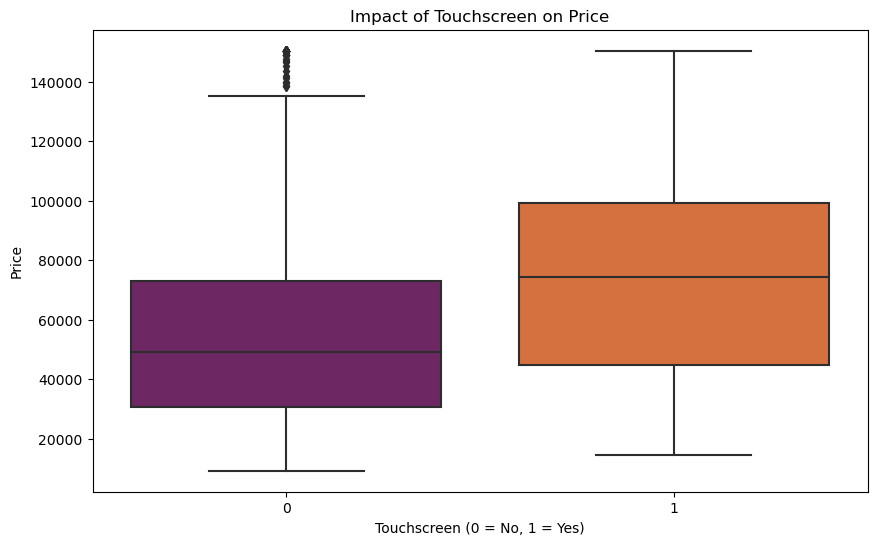

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_copy, x="Touchscreen", y="Price",palette="inferno")
plt.title("Impact of Touchscreen on Price")
plt.xlabel("Touchscreen (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()

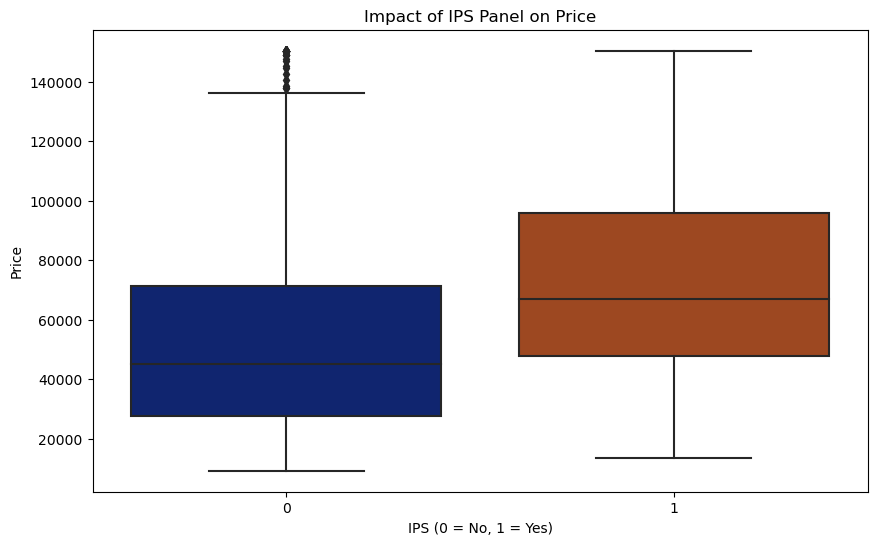

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_copy, x="IPS", y="Price", palette="dark")
plt.title("Impact of IPS Panel on Price")
plt.xlabel("IPS (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()

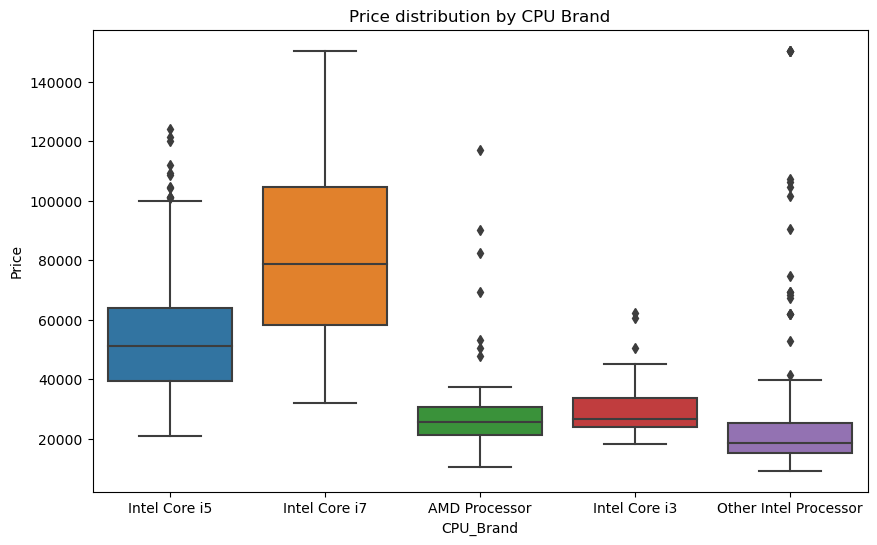

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_copy, x="CPU_Brand", y="Price")
plt.title("Price distribution by CPU Brand")
plt.show()

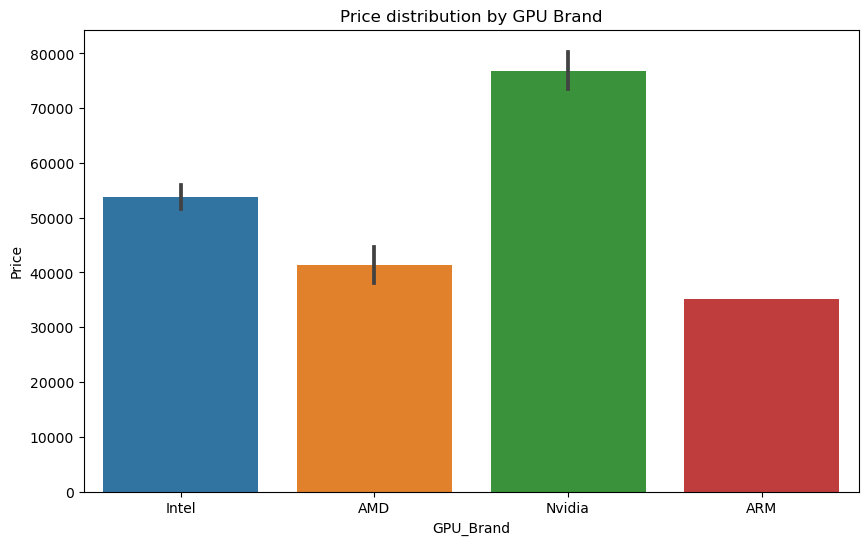

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=laptop_copy, x="GPU_Brand", y="Price")
plt.title("Price distribution by GPU Brand")
plt.show()

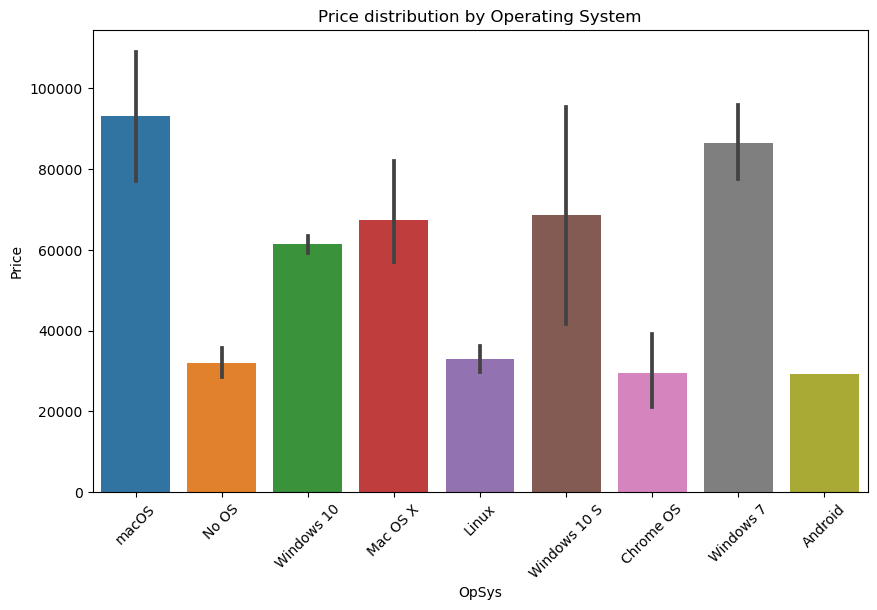

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=laptop_copy, x="OpSys", y="Price")
plt.title("Price distribution by Operating System")
plt.xticks(rotation=45)
plt.show()

In [56]:
laptop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  CPU_Brand         1273 non-null   object 
 14  SSD               1272 non-null   float64
 15  HDD               1272 non-null   float64
 16  Flash_Storage     1272 non-null   float64


Here it can be seen that there are one missing values in some of the columns. So, I will impute them.

In [78]:
laptop_copy.isnull().sum()

Company          0
TypeName         0
Inches           1
Ram              0
OpSys            0
Weight           1
Price            0
Touchscreen      0
IPS              0
CPU_Brand        0
SSD              1
HDD              1
Flash_Storage    1
Hybrid           1
GPU_Brand        0
dtype: int64

In [80]:
Null_one = laptop_copy[laptop_copy.isnull().any(axis=1)]
Null_one

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid,GPU_Brand
201,Dell,Ultrabook,13.3,8,Windows 10,NaN,77202.7200,0,0,Intel Core i7,256.0,0.0,0.0,0.0,Intel
465,Dell,Workstation,NaN,8,Windows 10,1.78,128298.2400,0,0,Intel Core i7,256.0,0.0,0.0,0.0,Nvidia
749,Dell,Notebook,15.6,14,Windows 10,2.30,62938.0656,0,0,Intel Core i7,NaN,NaN,NaN,NaN,AMD


In [81]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

laptop_copy['Inches'] = imputer.fit_transform(laptop_copy[['Inches']])
laptop_copy['Weight'] = imputer.fit_transform(laptop_copy[['Weight']])

# Impute missing values in 'SSD', 'HDD', 'Flash_Storage', and 'Hybrid' columns with 0
laptop_copy['SSD'] = laptop_copy['SSD'].fillna(0)
laptop_copy['HDD'] = laptop_copy['HDD'].fillna(0)
laptop_copy['Flash_Storage'] = laptop_copy['Flash_Storage'].fillna(0)
laptop_copy['Hybrid'] = laptop_copy['Hybrid'].fillna(0)

In [82]:
print(laptop_copy.isnull().sum())

Company          0
TypeName         0
Inches           0
Ram              0
OpSys            0
Weight           0
Price            0
Touchscreen      0
IPS              0
CPU_Brand        0
SSD              0
HDD              0
Flash_Storage    0
Hybrid           0
GPU_Brand        0
dtype: int64


In [83]:
laptop_copy.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid,GPU_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,Intel Core i5,128.0,0.0,0.0,0.0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,Intel Core i5,0.0,0.0,128.0,0.0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,Intel Core i5,256.0,0.0,0.0,0.0,Intel
3,Apple,Ultrabook,15.4,14,macOS,1.83,135195.3360,0,1,Intel Core i7,512.0,0.0,0.0,0.0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,Intel Core i5,256.0,0.0,0.0,0.0,Intel


# Feature Selection and Data preprocessing for modeling.

In [58]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

Drop Unnecesary Columns.

In [59]:
# Drop unnecessary columns.
laptop_copy = laptop_copy.drop(columns=['ScreenResolution', 'Memory', 'Cpu', 'Gpu'])

In [60]:
laptop_copy.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid,GPU_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,Intel Core i5,128.0,0.0,0.0,0.0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,Intel Core i5,0.0,0.0,128.0,0.0,Intel


Encoding categorical variables.

In [84]:
y = laptop_copy["Price"]
x = laptop_copy.drop(columns=["Price"])

In [85]:
x

,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,IPS,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid,GPU_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,0,1,Intel Core i5,128.0,0.0,0.0,0.0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,0,0,Intel Core i5,0.0,0.0,128.0,0.0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,0,0,Intel Core i5,256.0,0.0,0.0,0.0,Intel
3,Apple,Ultrabook,15.4,14,macOS,1.83,0,1,Intel Core i7,512.0,0.0,0.0,0.0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,0,1,Intel Core i5,256.0,0.0,0.0,0.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,1,1,Intel Core i7,128.0,0.0,0.0,0.0,Intel
1269,Lenovo,2 in 1 Convertible,13.3,14,Windows 10,1.30,1,1,Intel Core i7,512.0,0.0,0.0,0.0,Intel
1270,Lenovo,Notebook,14.0,2,Windows 10,1.50,0,0,Other Intel Processor,0.0,0.0,64.0,0.0,Intel
1271,HP,Notebook,15.6,6,Windows 10,2.19,0,0,Intel Core i7,0.0,1000.0,0.0,0.0,AMD


In [86]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1268     33992.6400
1269     79866.7200
1270     12201.1200
1271     40705.9200
1272     19660.3200
Name: Price, Length: 1273, dtype: float64

Apply OneHot Encoding

In [87]:
categorical_columns = ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'GPU_Brand']

encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_columns)
], remainder='passthrough')

x_encoded = encoder.fit_transform(x)

Scale the Data

In [88]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)

Train-Test Split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Model Training

In [68]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR 

# Importing Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Linear Regression**

In [90]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R2: {r2_lr}")

Linear Regression Results:
MAE: 13330.729810905306
MSE: 360141740.09792626
RMSE: 18977.400772970104
R2: 0.7088149566213403


**Decision Tree Regressor**

In [91]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"R2: {r2_dt}")

Decision Tree Results:
MAE: 11020.32620235294
MSE: 292640803.5446882
RMSE: 17106.747310482147
R2: 0.7633914218014394


**Random Forest Regresor**

In [92]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("random Forest Results:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2: {r2_rf}")

random Forest Results:
MAE: 9699.514707488854
MSE: 226260922.53549173
RMSE: 15041.972029474451
R2: 0.8170614810561024


**Support Vector Regressor**

In [93]:
svr = SVR()
svr.fit(x_train, y_train)

y_pred_svr = svr.predict(x_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Results:")
print(f"MAE: {mae_svr}")
print(f"MSE: {mse_svr}")
print(f"RMSE: {rmse_svr}")
print(f"R2: {r2_svr}")

SVR Results:
MAE: 28039.146605354003
MSE: 1348394862.8214908
RMSE: 36720.496494757404
R2: -0.09021635902430214


**XGBoost Regressor**

In [94]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R2: {r2_xgb}")

XGBoost Results:
MAE: 9881.998287199754
MSE: 241832648.3689188
RMSE: 15550.969370715087
R2: 0.8044712890359991


In [95]:
models_dataframe = pd.DataFrame({'Model Name':['Linear Regression','Decision Tree Regressor', 'RandomForest Regression','Support Vector Regressor(SVR)', 'XGBoost Regressor', 
                                                 ],'R_Score':[r2_lr, r2_dt, r2_rf, r2_svr, r2_xgb]})


In [96]:
models_dataframe

,Model Name,R_Score
0,Linear Regression,0.708815
1,Decision Tree Regressor,0.763391
2,RandomForest Regression,0.817061
3,Support Vector Regressor(SVR),-0.090216
4,XGBoost Regressor,0.804471
